In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [14]:
data = pd.read_csv("car data.csv")

data.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
data.info()
data.describe()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [16]:
data.columns


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
for col in ['Fuel_Type', 'Selling_type', 'Transmission']:
    data[col] = le.fit_transform(data[col])

X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
data.dtypes



Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type          int64
Selling_type       int64
Transmission       int64
Owner              int64
dtype: object

In [19]:
data = data.drop(['Car_Name'], axis=1)


In [20]:
# Split into features and target
X = data.drop(['Selling_Price'], axis=1)
y = data['Selling_Price']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "RMSE": rmse, "R2 Score": r2}

results_df = pd.DataFrame(results).T
results_df


,MAE,RMSE,R2 Score
Linear Regression,1.221932,1.879250,0.846690
Decision Tree,0.725246,1.118846,0.945657
Random Forest,0.617108,0.922619,0.963047


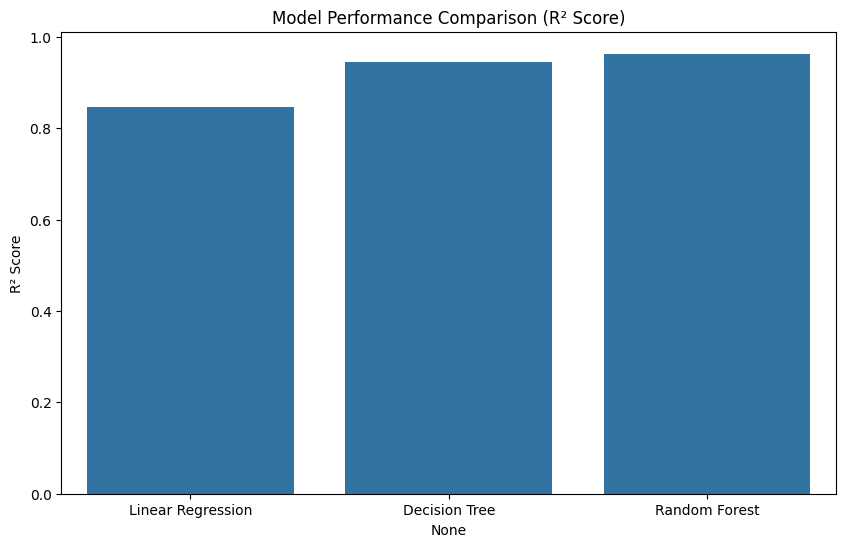

In [22]:
# Visualization of model comparison

plt.figure(figsize=(10,6))
sns.barplot(x=results_df.index, y=results_df["R2 Score"])
plt.title("Model Performance Comparison (R² Score)")
plt.ylabel("R² Score")
plt.show()


In [23]:
# TESTING

best_model_name = results_df['R2 Score'].idxmax()
best_model = models[best_model_name]

y_pred = best_model.predict(X_test)

comparison = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print(f"✅ Testing with best model: {best_model_name}")
comparison.head(10)


✅ Testing with best model: Random Forest


,Actual Price,Predicted Price
177,0.35,0.4403
289,10.11,11.0518
228,4.95,4.8970
198,0.15,0.2091
60,6.95,7.6840
9,7.45,6.2695
118,1.10,1.0999
154,0.50,0.5847
164,0.45,0.4653
33,6.00,6.8840


In [25]:
# Example: testing on a new car data

test_data = pd.DataFrame({
    'Year': [2018],
    'Present_Price': [9.5],
    'Driven_kms': [35000],
    'Fuel_Type': [1],          
    'Selling_type': [0],       
    'Transmission': [1],       
    'Owner': [0]
})

predicted_price = best_model.predict(test_data)
print(f"🚗 Predicted Selling Price: {predicted_price[0]:.2f} lakhs")


🚗 Predicted Selling Price: 8.06 lakhs


In [26]:
import joblib

# Save the best model (based on R²)

best_model_name = results_df['R2 Score'].idxmax()
best_model = models[best_model_name]
joblib.dump(best_model, 'best_car_price_model.pkl')

print(f"✅ Best model saved: {best_model_name}")


✅ Best model saved: Random Forest


In [27]:
# Using best model

import joblib

model = joblib.load('best_car_price_model.pkl')

predicted_price = model.predict(test_data)
print(f"Predicted Price: {predicted_price[0]:.2f} lakhs")


Predicted Price: 8.06 lakhs
